# Symbolic Regression mono-objective slow-wind

#### 1. Libraries importation

In [1]:
import math
import random
import csv
import numpy
import operator
import matplotlib.pyplot as plt
import pandas as pd
from deap import algorithms, base, creator , tools, gp

In [2]:
slow_wind = pd.read_csv(r'C:\Users\Christian Mariscal\Documents\TFM\venv_TFM\gp_data\slow_model_io.csv', delimiter = ';')

In [3]:
forecast = slow_wind['forecast']
slow_wind = slow_wind.drop(['Column1', 'forecast'], axis = 1)

In [4]:
slow_wind.describe()

,Bt_carrington_4,Bx_carrington_4,By_carrington_4,Bz_carrington_4,speed_carrington_4,p_density_carrington_4,temperature_carrington_4,Bt_1d_4,Bx_1d_4,By_1d_4,...,speed_carrington_1,p_density_carrington_1,temperature_carrington_1,Bt_1d_1,Bx_1d_1,By_1d_1,Bz_1d_1,speed_1d_1,p_density_1d_1,temperature_1d_1
count,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,...,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03
mean,1.039897e+16,2.559904e+14,-5.379288e+14,-1.309894e+14,1.153145e+16,9.870294e+15,1.025064e+16,1.008964e+16,3.676302e+14,-3.739428e+14,...,1.155863e+16,1.035769e+16,1.041449e+16,1.041841e+16,9.379931e+13,-1.203484e+14,1.030251e+14,1.229065e+16,1.010113e+16,1.034525e+16
std,1.322419e+16,1.364390e+16,1.405031e+16,8.062293e+15,1.428616e+16,1.190720e+16,1.182466e+16,1.304756e+16,1.368640e+16,1.388776e+16,...,1.435848e+16,1.214355e+16,1.150492e+16,1.328347e+16,1.321899e+16,1.376630e+16,7.846623e+15,1.486310e+16,1.215428e+16,1.244329e+16
min,4.447200e+04,-5.876290e+16,-6.713790e+16,-5.554930e+16,5.434000e+03,1.930000e+02,1.721750e+05,6.168000e+03,-4.196650e+16,-5.118540e+16,...,5.434000e+03,1.930000e+02,1.801200e+05,6.168000e+03,-4.778380e+16,-4.998580e+16,-5.554930e+16,3.922600e+04,1.930000e+02,1.721750e+05
25%,3.885300e+15,-4.975230e+15,-6.045380e+15,-3.735160e+15,3.480080e+15,3.862510e+15,3.105380e+15,3.909980e+15,-4.618050e+15,-5.805890e+15,...,3.546010e+15,3.864890e+15,3.069480e+15,3.795180e+15,-5.268440e+15,-5.760530e+15,-3.395510e+15,3.463970e+15,3.946300e+15,3.385660e+15
50%,5.174220e+15,2.434260e+14,-3.688910e+14,-1.054640e+14,4.048710e+15,6.181090e+15,5.986600e+15,5.054220e+15,1.930670e+14,-3.437440e+14,...,4.242190e+15,6.261260e+15,6.496430e+15,4.924070e+15,3.884940e+13,-2.122180e+14,9.362050e+12,3.974750e+15,6.133730e+15,5.932730e+15
75%,7.774980e+15,6.150900e+15,5.022820e+15,3.396310e+15,6.165590e+15,1.007480e+16,1.229840e+16,7.308260e+15,6.193350e+15,5.015360e+15,...,6.419410e+15,1.070730e+16,1.330630e+16,7.254060e+15,6.184520e+15,5.243210e+15,3.555380e+15,3.000780e+16,1.002790e+16,1.053070e+16
max,7.848980e+16,4.835230e+16,7.688740e+16,4.792190e+16,5.118540e+16,7.917530e+16,6.498140e+16,7.631170e+16,4.835230e+16,7.688740e+16,...,5.118540e+16,7.874620e+16,6.498140e+16,7.631170e+16,5.684290e+16,7.688740e+16,4.316420e+16,5.118540e+16,7.917530e+16,6.498140e+16


In [5]:
slow_wind.head()

,Bt_carrington_4,Bx_carrington_4,By_carrington_4,Bz_carrington_4,speed_carrington_4,p_density_carrington_4,temperature_carrington_4,Bt_1d_4,Bx_1d_4,By_1d_4,...,speed_carrington_1,p_density_carrington_1,temperature_carrington_1,Bt_1d_1,Bx_1d_1,By_1d_1,Bz_1d_1,speed_1d_1,p_density_1d_1,temperature_1d_1
0,6.773410e+15,6.989780e+15,2.957650e+15,4.048290e+15,2.898910e+14,7.714570e+15,1.823410e+14,4.081540e+15,-1.958430e+16,1.352320e+15,...,2.938830e+15,6.676900e+15,2.571510e+15,5.483080e+15,-2.611260e+16,2.772290e+16,-6.766620e+15,3.477900e+15,7.052430e+15,5.410300e+15
1,5.974020e+15,9.481930e+14,1.488710e+15,-1.583420e+16,2.856250e+15,1.161550e+15,4.436980e+15,4.325170e+15,-2.100820e+15,2.781790e+15,...,3.221810e+16,4.170930e+15,3.583100e+16,4.268760e+15,-2.583940e+13,1.896330e+16,9.022630e+15,3.379020e+15,4.832070e+15,5.756180e+15
2,5.778590e+15,-7.219510e+15,4.438830e+15,4.888590e+15,2.878910e+16,8.000820e+15,5.893990e+15,4.118370e+15,-1.729390e+16,2.383940e+16,...,2.940150e+15,6.212760e+15,2.637000e+15,6.360140e+15,-3.107450e+16,2.173450e+16,-2.623340e+15,3.602560e+14,8.297870e+13,6.789280e+14
3,4.567840e+15,2.056400e+16,-1.386920e+15,3.396310e+15,5.216590e+15,2.806730e+16,1.374940e+14,4.307470e+15,-7.663740e+15,2.518910e+16,...,3.526560e+15,7.474640e+15,6.517270e+15,6.298940e+15,1.859310e+15,-2.658520e+15,2.471480e+15,3.539390e+15,1.220080e+15,5.915370e+15
4,4.087820e+15,2.993410e+16,-1.408470e+16,8.111440e+15,4.262090e+15,3.223670e+16,7.214110e+15,3.586080e+16,-1.163410e+16,1.573980e+14,...,3.644530e+15,5.361380e+15,5.768170e+15,5.076840e+15,1.560890e+15,6.279910e+15,-3.768790e+14,3.783010e+15,6.580060e+15,5.855230e+14


In [6]:
slow_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bt_carrington_4           3177 non-null   float64
 1   Bx_carrington_4           3177 non-null   float64
 2   By_carrington_4           3177 non-null   float64
 3   Bz_carrington_4           3177 non-null   float64
 4   speed_carrington_4        3177 non-null   float64
 5   p_density_carrington_4    3177 non-null   float64
 6   temperature_carrington_4  3177 non-null   float64
 7   Bt_1d_4                   3177 non-null   float64
 8   Bx_1d_4                   3177 non-null   float64
 9   By_1d_4                   3177 non-null   float64
 10  Bz_1d_4                   3177 non-null   float64
 11  speed_1d_4                3177 non-null   float64
 12  p_density_1d_4            3177 non-null   float64
 13  temperature_1d_4          3177 non-null   float64
 14  Bt_carri

#### 2. Defining primitive set

In [7]:
# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

#Second argument = number of variables in problem (this case, 'x')
pset = gp.PrimitiveSet("MAIN", 56)
#Second argument = arity
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addEphemeralConstant("rand101", lambda: random.randint(-10,10))
#Renaming arguments
renArg = dict(zip(pset.arguments, list(slow_wind.columns)))
pset.renameArguments(**renArg)


#### 3. Parameters definition

In [8]:
#Defining fitness class
creator.create("FitnessMin", base.Fitness, weights=(-1,))
#Defining individuals shape and associatinf fitness attribute
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

#Creating toolbox to register: population creation, evaluation function, selection mecanism
#and genetic operators
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalSymbReg(individual):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression
    # and the real function : x**4 + x**3 + x**2 + x
    sqerrors = ((func(*slow_wind.iloc[nrow]) - forecast[nrow])**2 for nrow in random.sample(range(len(slow_wind)), 100))
    return math.fsum(sqerrors) / len(slow_wind),

toolbox.register("evaluate", evalSymbReg)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

#### 4. Algorithm initialization

In [9]:
def main():
    random.seed(318)

    pop = toolbox.population(n=500)
    hof = tools.HallOfFame(1)

    stats_fit_mse = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(mse=stats_fit_mse, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("std", numpy.std)
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)

    pop, log, hof = algorithms.eaSimpleOr(pop, toolbox, .8, .1, 500, stats=mstats,
                                   halloffame=hof, verbose=True, multi = False)
    return pop, log, hof

if __name__ == "__main__":
    pop, log, hof = main()

Entering without multiprocessing activated


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

Entering 1th generation


  0%|▏                                                                                 | 1/500 [00:02<19:24,  2.33s/it]

Entering 2th generation


  0%|▎                                                                                 | 2/500 [00:04<18:46,  2.26s/it]

Entering 3th generation


  1%|▍                                                                                 | 3/500 [00:06<18:34,  2.24s/it]

Entering 4th generation


  1%|▋                                                                                 | 4/500 [00:09<18:57,  2.29s/it]

Entering 5th generation


  1%|▊                                                                                 | 5/500 [00:11<19:14,  2.33s/it]

Entering 6th generation


  1%|▉                                                                                 | 6/500 [00:13<19:12,  2.33s/it]

Entering 7th generation


  1%|█▏                                                                                | 7/500 [00:16<19:21,  2.36s/it]

Entering 8th generation


  2%|█▎                                                                                | 8/500 [00:18<18:44,  2.29s/it]

Entering 9th generation


  2%|█▍                                                                                | 9/500 [00:20<18:29,  2.26s/it]

Entering 10th generation


  2%|█▌                                                                               | 10/500 [00:22<18:39,  2.29s/it]

Entering 11th generation


  2%|█▊                                                                               | 11/500 [00:25<19:05,  2.34s/it]

Entering 12th generation


  2%|█▉                                                                               | 12/500 [00:27<19:04,  2.35s/it]

Entering 13th generation


  3%|██                                                                               | 13/500 [00:30<19:16,  2.38s/it]

Entering 14th generation


  3%|██▎                                                                              | 14/500 [00:32<19:33,  2.41s/it]

Entering 15th generation


  3%|██▍                                                                              | 15/500 [00:35<20:01,  2.48s/it]

Entering 16th generation


  3%|██▌                                                                              | 16/500 [00:37<19:39,  2.44s/it]

Entering 17th generation


  3%|██▊                                                                              | 17/500 [00:40<19:30,  2.42s/it]

Entering 18th generation


  4%|██▉                                                                              | 18/500 [00:42<19:27,  2.42s/it]

Entering 19th generation


  4%|███                                                                              | 19/500 [00:45<19:37,  2.45s/it]

Entering 20th generation


  4%|███▏                                                                             | 20/500 [00:47<19:06,  2.39s/it]

Entering 21th generation


  4%|███▍                                                                             | 21/500 [00:49<19:06,  2.39s/it]

Entering 22th generation


  4%|███▌                                                                             | 22/500 [00:52<19:26,  2.44s/it]

Entering 23th generation


  5%|███▋                                                                             | 23/500 [00:54<19:08,  2.41s/it]

Entering 24th generation


  5%|███▉                                                                             | 24/500 [00:56<19:08,  2.41s/it]

Entering 25th generation


  5%|████                                                                             | 25/500 [00:59<19:11,  2.42s/it]

Entering 26th generation


  5%|████▏                                                                            | 26/500 [01:01<19:16,  2.44s/it]

Entering 27th generation


  5%|████▎                                                                            | 27/500 [01:04<18:31,  2.35s/it]

Entering 28th generation


  6%|████▌                                                                            | 28/500 [01:06<18:00,  2.29s/it]

Entering 29th generation


  6%|████▋                                                                            | 29/500 [01:08<17:54,  2.28s/it]

Entering 30th generation


  6%|████▊                                                                            | 30/500 [01:10<17:45,  2.27s/it]

Entering 31th generation


  6%|█████                                                                            | 31/500 [01:12<17:29,  2.24s/it]

Entering 32th generation


  6%|█████▏                                                                           | 32/500 [01:15<17:24,  2.23s/it]

Entering 33th generation


  7%|█████▎                                                                           | 33/500 [01:17<17:34,  2.26s/it]

Entering 34th generation


  7%|█████▌                                                                           | 34/500 [01:19<17:30,  2.25s/it]

Entering 35th generation


  7%|█████▋                                                                           | 35/500 [01:22<17:51,  2.30s/it]

Entering 36th generation


  7%|█████▊                                                                           | 36/500 [01:24<17:57,  2.32s/it]

Entering 37th generation


  7%|█████▉                                                                           | 37/500 [01:26<18:23,  2.38s/it]

Entering 38th generation


  8%|██████▏                                                                          | 38/500 [01:29<17:59,  2.34s/it]

Entering 39th generation


  8%|██████▎                                                                          | 39/500 [01:31<17:50,  2.32s/it]

Entering 40th generation


  8%|██████▍                                                                          | 40/500 [01:33<17:27,  2.28s/it]

Entering 41th generation


  8%|██████▋                                                                          | 41/500 [01:35<17:11,  2.25s/it]

Entering 42th generation


  8%|██████▊                                                                          | 42/500 [01:38<17:02,  2.23s/it]

Entering 43th generation


  9%|██████▉                                                                          | 43/500 [01:40<17:39,  2.32s/it]

Entering 44th generation


  9%|███████▏                                                                         | 44/500 [01:43<17:58,  2.37s/it]

Entering 45th generation


  9%|███████▎                                                                         | 45/500 [01:45<17:29,  2.31s/it]

Entering 46th generation


  9%|███████▍                                                                         | 46/500 [01:47<17:13,  2.28s/it]

Entering 47th generation


  9%|███████▌                                                                         | 47/500 [01:49<16:55,  2.24s/it]

Entering 48th generation


 10%|███████▊                                                                         | 48/500 [01:51<16:36,  2.21s/it]

Entering 49th generation


 10%|███████▉                                                                         | 49/500 [01:53<16:27,  2.19s/it]

Entering 50th generation


 10%|████████                                                                         | 50/500 [01:55<16:13,  2.16s/it]

Entering 51th generation


 10%|████████▎                                                                        | 51/500 [01:58<16:09,  2.16s/it]

Entering 52th generation


 10%|████████▍                                                                        | 52/500 [02:00<16:16,  2.18s/it]

Entering 53th generation


 11%|████████▌                                                                        | 53/500 [02:02<16:32,  2.22s/it]

Entering 54th generation


 11%|████████▋                                                                        | 54/500 [02:04<16:41,  2.25s/it]

Entering 55th generation


 11%|████████▉                                                                        | 55/500 [02:07<16:45,  2.26s/it]

Entering 56th generation


 11%|█████████                                                                        | 56/500 [02:09<16:57,  2.29s/it]

Entering 57th generation


 11%|█████████▏                                                                       | 57/500 [02:11<17:03,  2.31s/it]

Entering 58th generation


 12%|█████████▍                                                                       | 58/500 [02:14<16:33,  2.25s/it]

Entering 59th generation


 12%|█████████▌                                                                       | 59/500 [02:16<16:26,  2.24s/it]

Entering 60th generation


 12%|█████████▋                                                                       | 60/500 [02:18<16:18,  2.22s/it]

Entering 61th generation


 12%|█████████▉                                                                       | 61/500 [02:20<16:18,  2.23s/it]

Entering 62th generation


 12%|██████████                                                                       | 62/500 [02:22<16:23,  2.24s/it]

Entering 63th generation


 13%|██████████▏                                                                      | 63/500 [02:25<16:02,  2.20s/it]

Entering 64th generation


 13%|██████████▎                                                                      | 64/500 [02:27<15:55,  2.19s/it]

Entering 65th generation


 13%|██████████▌                                                                      | 65/500 [02:29<16:00,  2.21s/it]

Entering 66th generation


 13%|██████████▋                                                                      | 66/500 [02:31<15:54,  2.20s/it]

Entering 67th generation


 13%|██████████▊                                                                      | 67/500 [02:33<15:49,  2.19s/it]

Entering 68th generation


 14%|███████████                                                                      | 68/500 [02:36<15:48,  2.20s/it]

Entering 69th generation


 14%|███████████▏                                                                     | 69/500 [02:38<15:50,  2.20s/it]

Entering 70th generation


 14%|███████████▎                                                                     | 70/500 [02:40<15:51,  2.21s/it]

Entering 71th generation


 14%|███████████▌                                                                     | 71/500 [02:42<16:00,  2.24s/it]

Entering 72th generation


 14%|███████████▋                                                                     | 72/500 [02:44<15:53,  2.23s/it]

Entering 73th generation


 15%|███████████▊                                                                     | 73/500 [02:47<15:47,  2.22s/it]

Entering 74th generation


 15%|███████████▉                                                                     | 74/500 [02:49<15:36,  2.20s/it]

Entering 75th generation


 15%|████████████▏                                                                    | 75/500 [02:51<15:42,  2.22s/it]

Entering 76th generation


 15%|████████████▎                                                                    | 76/500 [02:53<16:01,  2.27s/it]

Entering 77th generation


 15%|████████████▍                                                                    | 77/500 [02:56<16:31,  2.34s/it]

Entering 78th generation


 16%|████████████▋                                                                    | 78/500 [02:59<18:10,  2.58s/it]

Entering 79th generation


 16%|████████████▊                                                                    | 79/500 [03:02<19:14,  2.74s/it]

Entering 80th generation


 16%|████████████▉                                                                    | 80/500 [03:05<18:19,  2.62s/it]

Entering 81th generation


 16%|█████████████                                                                    | 81/500 [03:07<18:24,  2.64s/it]

Entering 82th generation


 16%|█████████████▎                                                                   | 82/500 [03:10<18:06,  2.60s/it]

Entering 83th generation


 17%|█████████████▍                                                                   | 83/500 [03:12<17:18,  2.49s/it]

Entering 84th generation


 17%|█████████████▌                                                                   | 84/500 [03:14<16:39,  2.40s/it]

Entering 85th generation


 17%|█████████████▊                                                                   | 85/500 [03:16<16:14,  2.35s/it]

Entering 86th generation


 17%|█████████████▉                                                                   | 86/500 [03:19<15:50,  2.30s/it]

Entering 87th generation


 17%|██████████████                                                                   | 87/500 [03:21<15:31,  2.26s/it]

Entering 88th generation


 18%|██████████████▎                                                                  | 88/500 [03:23<15:19,  2.23s/it]

Entering 89th generation


 18%|██████████████▍                                                                  | 89/500 [03:25<15:26,  2.25s/it]

Entering 90th generation


 18%|██████████████▌                                                                  | 90/500 [03:27<15:17,  2.24s/it]

Entering 91th generation


 18%|██████████████▋                                                                  | 91/500 [03:30<15:38,  2.30s/it]

Entering 92th generation


 18%|██████████████▉                                                                  | 92/500 [03:32<15:59,  2.35s/it]

Entering 93th generation


 19%|███████████████                                                                  | 93/500 [03:35<15:32,  2.29s/it]

Entering 94th generation


 19%|███████████████▏                                                                 | 94/500 [03:37<15:39,  2.31s/it]

Entering 95th generation


 19%|███████████████▍                                                                 | 95/500 [03:39<15:59,  2.37s/it]

Entering 96th generation


 19%|███████████████▌                                                                 | 96/500 [03:42<15:35,  2.32s/it]

Entering 97th generation


 19%|███████████████▋                                                                 | 97/500 [03:44<15:17,  2.28s/it]

Entering 98th generation


 20%|███████████████▉                                                                 | 98/500 [03:46<15:19,  2.29s/it]

Entering 99th generation


 20%|████████████████                                                                 | 99/500 [03:48<15:09,  2.27s/it]

Entering 100th generation


 20%|████████████████                                                                | 100/500 [03:50<14:53,  2.23s/it]

Entering 101th generation


 20%|████████████████▏                                                               | 101/500 [03:53<14:42,  2.21s/it]

Entering 102th generation


 20%|████████████████▎                                                               | 102/500 [03:55<14:36,  2.20s/it]

Entering 103th generation


 21%|████████████████▍                                                               | 103/500 [03:57<14:24,  2.18s/it]

Entering 104th generation


 21%|████████████████▋                                                               | 104/500 [03:59<14:19,  2.17s/it]

Entering 105th generation


 21%|████████████████▊                                                               | 105/500 [04:01<14:08,  2.15s/it]

Entering 106th generation


 21%|████████████████▉                                                               | 106/500 [04:03<14:02,  2.14s/it]

Entering 107th generation


 21%|█████████████████                                                               | 107/500 [04:05<13:54,  2.12s/it]

Entering 108th generation


 22%|█████████████████▎                                                              | 108/500 [04:08<14:31,  2.22s/it]

Entering 109th generation


 22%|█████████████████▍                                                              | 109/500 [04:10<14:54,  2.29s/it]

Entering 110th generation


 22%|█████████████████▌                                                              | 110/500 [04:13<14:47,  2.28s/it]

Entering 111th generation


 22%|█████████████████▊                                                              | 111/500 [04:15<14:33,  2.24s/it]

Entering 112th generation


 22%|█████████████████▉                                                              | 112/500 [04:17<14:19,  2.22s/it]

Entering 113th generation


 23%|██████████████████                                                              | 113/500 [04:19<14:14,  2.21s/it]

Entering 114th generation


 23%|██████████████████▏                                                             | 114/500 [04:21<14:17,  2.22s/it]

Entering 115th generation


 23%|██████████████████▍                                                             | 115/500 [04:24<14:18,  2.23s/it]

Entering 116th generation


 23%|██████████████████▌                                                             | 116/500 [04:26<14:21,  2.24s/it]

Entering 117th generation


 23%|██████████████████▋                                                             | 117/500 [04:28<14:19,  2.24s/it]

Entering 118th generation


 24%|██████████████████▉                                                             | 118/500 [04:30<14:18,  2.25s/it]

Entering 119th generation


 24%|███████████████████                                                             | 119/500 [04:32<14:05,  2.22s/it]

Entering 120th generation


 24%|███████████████████▏                                                            | 120/500 [04:35<13:47,  2.18s/it]

Entering 121th generation


 24%|███████████████████▎                                                            | 121/500 [04:37<13:35,  2.15s/it]

Entering 122th generation


 24%|███████████████████▌                                                            | 122/500 [04:39<13:37,  2.16s/it]

Entering 123th generation


 25%|███████████████████▋                                                            | 123/500 [04:41<13:26,  2.14s/it]

Entering 124th generation


 25%|███████████████████▊                                                            | 124/500 [04:43<13:41,  2.18s/it]

Entering 125th generation


 25%|████████████████████                                                            | 125/500 [04:45<13:42,  2.19s/it]

Entering 126th generation


 25%|████████████████████▏                                                           | 126/500 [04:48<13:32,  2.17s/it]

Entering 127th generation


 25%|████████████████████▎                                                           | 127/500 [04:50<13:25,  2.16s/it]

Entering 128th generation


 26%|████████████████████▍                                                           | 128/500 [04:52<13:19,  2.15s/it]

Entering 129th generation


 26%|████████████████████▋                                                           | 129/500 [04:54<13:25,  2.17s/it]

Entering 130th generation


 26%|████████████████████▊                                                           | 130/500 [04:56<13:18,  2.16s/it]

Entering 131th generation


 26%|████████████████████▉                                                           | 131/500 [04:58<13:16,  2.16s/it]

Entering 132th generation


 26%|█████████████████████                                                           | 132/500 [05:00<13:13,  2.16s/it]

Entering 133th generation


 27%|█████████████████████▎                                                          | 133/500 [05:03<13:02,  2.13s/it]

Entering 134th generation


 27%|█████████████████████▍                                                          | 134/500 [05:05<12:47,  2.10s/it]

Entering 135th generation


 27%|█████████████████████▌                                                          | 135/500 [05:07<12:44,  2.09s/it]

Entering 136th generation


 27%|█████████████████████▊                                                          | 136/500 [05:09<12:43,  2.10s/it]

Entering 137th generation


 27%|█████████████████████▉                                                          | 137/500 [05:11<12:45,  2.11s/it]

Entering 138th generation


 28%|██████████████████████                                                          | 138/500 [05:13<12:44,  2.11s/it]

Entering 139th generation


 28%|██████████████████████▏                                                         | 139/500 [05:15<12:34,  2.09s/it]

Entering 140th generation


 28%|██████████████████████▍                                                         | 140/500 [05:17<12:35,  2.10s/it]

Entering 141th generation


 28%|██████████████████████▌                                                         | 141/500 [05:19<12:30,  2.09s/it]

Entering 142th generation


 28%|██████████████████████▋                                                         | 142/500 [05:21<12:34,  2.11s/it]

Entering 143th generation


 29%|██████████████████████▉                                                         | 143/500 [05:23<12:24,  2.09s/it]

Entering 144th generation


 29%|███████████████████████                                                         | 144/500 [05:26<12:43,  2.14s/it]

Entering 145th generation


 29%|███████████████████████▏                                                        | 145/500 [05:28<12:46,  2.16s/it]

Entering 146th generation


 29%|███████████████████████▎                                                        | 146/500 [05:30<12:41,  2.15s/it]

Entering 147th generation


 29%|███████████████████████▌                                                        | 147/500 [05:32<12:37,  2.15s/it]

Entering 148th generation


 30%|███████████████████████▋                                                        | 148/500 [05:34<12:37,  2.15s/it]

Entering 149th generation


 30%|███████████████████████▊                                                        | 149/500 [05:37<13:11,  2.26s/it]

Entering 150th generation


 30%|████████████████████████                                                        | 150/500 [05:39<13:17,  2.28s/it]

Entering 151th generation


 30%|████████████████████████▏                                                       | 151/500 [05:41<12:56,  2.23s/it]

Entering 152th generation


 30%|████████████████████████▎                                                       | 152/500 [05:44<13:04,  2.25s/it]

Entering 153th generation


 31%|████████████████████████▍                                                       | 153/500 [05:46<13:51,  2.40s/it]

Entering 154th generation


 31%|████████████████████████▋                                                       | 154/500 [05:49<13:40,  2.37s/it]

Entering 155th generation


 31%|████████████████████████▊                                                       | 155/500 [05:51<13:38,  2.37s/it]

Entering 156th generation


 31%|████████████████████████▉                                                       | 156/500 [05:53<13:44,  2.40s/it]

Entering 157th generation


 31%|█████████████████████████                                                       | 157/500 [05:56<13:49,  2.42s/it]

Entering 158th generation


 32%|█████████████████████████▎                                                      | 158/500 [05:58<13:41,  2.40s/it]

Entering 159th generation


 32%|█████████████████████████▍                                                      | 159/500 [06:01<13:27,  2.37s/it]

Entering 160th generation


 32%|█████████████████████████▌                                                      | 160/500 [06:03<13:18,  2.35s/it]

Entering 161th generation


 32%|█████████████████████████▊                                                      | 161/500 [06:05<12:57,  2.29s/it]

Entering 162th generation


 32%|█████████████████████████▉                                                      | 162/500 [06:07<12:35,  2.24s/it]

Entering 163th generation


 33%|██████████████████████████                                                      | 163/500 [06:09<12:30,  2.23s/it]

Entering 164th generation


 33%|██████████████████████████▏                                                     | 164/500 [06:12<12:55,  2.31s/it]

Entering 165th generation


 33%|██████████████████████████▍                                                     | 165/500 [06:14<12:44,  2.28s/it]

Entering 166th generation


 33%|██████████████████████████▌                                                     | 166/500 [06:16<12:36,  2.26s/it]

Entering 167th generation


 33%|██████████████████████████▋                                                     | 167/500 [06:19<12:48,  2.31s/it]

Entering 168th generation


 34%|██████████████████████████▉                                                     | 168/500 [06:21<12:56,  2.34s/it]

Entering 169th generation


 34%|███████████████████████████                                                     | 169/500 [06:23<12:47,  2.32s/it]

Entering 170th generation


 34%|███████████████████████████▏                                                    | 170/500 [06:26<12:33,  2.28s/it]

Entering 171th generation


 34%|███████████████████████████▎                                                    | 171/500 [06:28<12:48,  2.34s/it]

Entering 172th generation


 34%|███████████████████████████▌                                                    | 172/500 [06:30<12:50,  2.35s/it]

Entering 173th generation


 35%|███████████████████████████▋                                                    | 173/500 [06:33<12:58,  2.38s/it]

Entering 174th generation


 35%|███████████████████████████▊                                                    | 174/500 [06:35<13:06,  2.41s/it]

Entering 175th generation


 35%|████████████████████████████                                                    | 175/500 [06:38<14:02,  2.59s/it]

Entering 176th generation


 35%|████████████████████████████▏                                                   | 176/500 [06:41<13:48,  2.56s/it]

Entering 177th generation


 35%|████████████████████████████▎                                                   | 177/500 [06:44<13:57,  2.59s/it]

Entering 178th generation


 36%|████████████████████████████▍                                                   | 178/500 [06:46<13:54,  2.59s/it]

Entering 179th generation


 36%|████████████████████████████▋                                                   | 179/500 [06:49<13:34,  2.54s/it]

Entering 180th generation


 36%|████████████████████████████▊                                                   | 180/500 [06:51<13:19,  2.50s/it]

Entering 181th generation


 36%|████████████████████████████▉                                                   | 181/500 [06:53<13:25,  2.53s/it]

Entering 182th generation


 36%|█████████████████████████████                                                   | 182/500 [06:56<13:15,  2.50s/it]

Entering 183th generation


 37%|█████████████████████████████▎                                                  | 183/500 [06:59<13:51,  2.62s/it]

Entering 184th generation


 37%|█████████████████████████████▍                                                  | 184/500 [07:01<13:47,  2.62s/it]

Entering 185th generation


 37%|█████████████████████████████▌                                                  | 185/500 [07:04<14:04,  2.68s/it]

Entering 186th generation


 37%|█████████████████████████████▊                                                  | 186/500 [07:07<13:37,  2.60s/it]

Entering 187th generation


 37%|█████████████████████████████▉                                                  | 187/500 [07:09<13:16,  2.55s/it]

Entering 188th generation


 38%|██████████████████████████████                                                  | 188/500 [07:12<13:37,  2.62s/it]

Entering 189th generation


 38%|██████████████████████████████▏                                                 | 189/500 [07:14<13:08,  2.53s/it]

Entering 190th generation


 38%|██████████████████████████████▍                                                 | 190/500 [07:17<12:47,  2.47s/it]

Entering 191th generation


 38%|██████████████████████████████▌                                                 | 191/500 [07:19<12:33,  2.44s/it]

Entering 192th generation


 38%|██████████████████████████████▋                                                 | 192/500 [07:21<12:27,  2.43s/it]

Entering 193th generation


 39%|██████████████████████████████▉                                                 | 193/500 [07:24<12:04,  2.36s/it]

Entering 194th generation


 39%|███████████████████████████████                                                 | 194/500 [07:26<11:46,  2.31s/it]

Entering 195th generation


 39%|███████████████████████████████▏                                                | 195/500 [07:28<11:57,  2.35s/it]

Entering 196th generation


 39%|███████████████████████████████▎                                                | 196/500 [07:31<11:53,  2.35s/it]

Entering 197th generation


 39%|███████████████████████████████▌                                                | 197/500 [07:33<11:46,  2.33s/it]

Entering 198th generation


 40%|███████████████████████████████▋                                                | 198/500 [07:35<11:52,  2.36s/it]

Entering 199th generation


 40%|███████████████████████████████▊                                                | 199/500 [07:37<11:37,  2.32s/it]

Entering 200th generation


 40%|████████████████████████████████                                                | 200/500 [07:40<11:53,  2.38s/it]

Entering 201th generation


 40%|████████████████████████████████▏                                               | 201/500 [07:42<11:42,  2.35s/it]

Entering 202th generation


 40%|████████████████████████████████▎                                               | 202/500 [07:45<11:36,  2.34s/it]

Entering 203th generation


 41%|████████████████████████████████▍                                               | 203/500 [07:48<13:10,  2.66s/it]

Entering 204th generation


 41%|████████████████████████████████▋                                               | 204/500 [07:51<13:47,  2.80s/it]

Entering 205th generation


 41%|████████████████████████████████▊                                               | 205/500 [07:54<14:11,  2.89s/it]

Entering 206th generation


 41%|████████████████████████████████▉                                               | 206/500 [07:57<14:18,  2.92s/it]

Entering 207th generation


 41%|█████████████████████████████████                                               | 207/500 [08:00<14:29,  2.97s/it]

Entering 208th generation


 42%|█████████████████████████████████▎                                              | 208/500 [08:04<14:50,  3.05s/it]

Entering 209th generation


 42%|█████████████████████████████████▍                                              | 209/500 [08:06<14:31,  2.99s/it]

Entering 210th generation


 42%|█████████████████████████████████▌                                              | 210/500 [08:09<14:11,  2.93s/it]

Entering 211th generation


 42%|█████████████████████████████████▊                                              | 211/500 [08:12<14:13,  2.95s/it]

Entering 212th generation


 42%|█████████████████████████████████▉                                              | 212/500 [08:15<13:55,  2.90s/it]

Entering 213th generation


 43%|██████████████████████████████████                                              | 213/500 [08:18<13:54,  2.91s/it]

Entering 214th generation


 43%|██████████████████████████████████▏                                             | 214/500 [08:20<13:24,  2.81s/it]

Entering 215th generation


 43%|██████████████████████████████████▍                                             | 215/500 [08:23<13:06,  2.76s/it]

Entering 216th generation


 43%|██████████████████████████████████▌                                             | 216/500 [08:25<12:31,  2.65s/it]

Entering 217th generation


 43%|██████████████████████████████████▋                                             | 217/500 [08:28<12:19,  2.61s/it]

Entering 218th generation


 44%|██████████████████████████████████▉                                             | 218/500 [08:30<12:02,  2.56s/it]

Entering 219th generation


 44%|███████████████████████████████████                                             | 219/500 [08:33<11:51,  2.53s/it]

Entering 220th generation


 44%|███████████████████████████████████▏                                            | 220/500 [08:35<11:39,  2.50s/it]

Entering 221th generation


 44%|███████████████████████████████████▎                                            | 221/500 [08:38<11:34,  2.49s/it]

Entering 222th generation


 44%|███████████████████████████████████▌                                            | 222/500 [08:40<11:35,  2.50s/it]

Entering 223th generation


 45%|███████████████████████████████████▋                                            | 223/500 [08:43<11:26,  2.48s/it]

Entering 224th generation


 45%|███████████████████████████████████▊                                            | 224/500 [08:45<11:22,  2.47s/it]

Entering 225th generation


 45%|████████████████████████████████████                                            | 225/500 [08:48<11:20,  2.48s/it]

Entering 226th generation


 45%|████████████████████████████████████▏                                           | 226/500 [08:50<11:22,  2.49s/it]

Entering 227th generation


 45%|████████████████████████████████████▎                                           | 227/500 [08:53<11:20,  2.49s/it]

Entering 228th generation


 46%|████████████████████████████████████▍                                           | 228/500 [08:55<11:24,  2.52s/it]

Entering 229th generation


 46%|████████████████████████████████████▋                                           | 229/500 [08:58<11:35,  2.57s/it]

Entering 230th generation


 46%|████████████████████████████████████▊                                           | 230/500 [09:01<11:33,  2.57s/it]

Entering 231th generation


 46%|████████████████████████████████████▉                                           | 231/500 [09:03<11:22,  2.54s/it]

Entering 232th generation


 46%|█████████████████████████████████████                                           | 232/500 [09:06<11:16,  2.52s/it]

Entering 233th generation


 47%|█████████████████████████████████████▎                                          | 233/500 [09:08<11:24,  2.56s/it]

Entering 234th generation


 47%|█████████████████████████████████████▍                                          | 234/500 [09:11<11:26,  2.58s/it]

Entering 235th generation


 47%|█████████████████████████████████████▌                                          | 235/500 [09:13<11:22,  2.58s/it]

Entering 236th generation


 47%|█████████████████████████████████████▊                                          | 236/500 [09:16<11:22,  2.59s/it]

Entering 237th generation


 47%|█████████████████████████████████████▉                                          | 237/500 [09:19<11:20,  2.59s/it]

Entering 238th generation


 48%|██████████████████████████████████████                                          | 238/500 [09:21<11:25,  2.62s/it]

Entering 239th generation


 48%|██████████████████████████████████████▏                                         | 239/500 [09:24<11:24,  2.62s/it]

Entering 240th generation


 48%|██████████████████████████████████████▍                                         | 240/500 [09:26<11:21,  2.62s/it]

Entering 241th generation


 48%|██████████████████████████████████████▌                                         | 241/500 [09:29<11:17,  2.62s/it]

Entering 242th generation


 48%|██████████████████████████████████████▋                                         | 242/500 [09:32<11:12,  2.61s/it]

Entering 243th generation


 49%|██████████████████████████████████████▉                                         | 243/500 [09:34<11:02,  2.58s/it]

Entering 244th generation


 49%|███████████████████████████████████████                                         | 244/500 [09:37<10:48,  2.53s/it]

Entering 245th generation


 49%|███████████████████████████████████████▏                                        | 245/500 [09:39<10:47,  2.54s/it]

Entering 246th generation


 49%|███████████████████████████████████████▎                                        | 246/500 [09:42<11:27,  2.71s/it]

Entering 247th generation


 49%|███████████████████████████████████████▌                                        | 247/500 [09:45<11:50,  2.81s/it]

Entering 248th generation


 50%|███████████████████████████████████████▋                                        | 248/500 [09:48<11:55,  2.84s/it]

Entering 249th generation


 50%|███████████████████████████████████████▊                                        | 249/500 [09:51<12:11,  2.92s/it]

Entering 250th generation


 50%|████████████████████████████████████████                                        | 250/500 [09:54<12:20,  2.96s/it]

Entering 251th generation


 50%|████████████████████████████████████████▏                                       | 251/500 [09:57<12:24,  2.99s/it]

Entering 252th generation


 50%|████████████████████████████████████████▎                                       | 252/500 [10:00<12:09,  2.94s/it]

Entering 253th generation


 51%|████████████████████████████████████████▍                                       | 253/500 [10:03<12:13,  2.97s/it]

Entering 254th generation


 51%|████████████████████████████████████████▋                                       | 254/500 [10:06<12:21,  3.01s/it]

Entering 255th generation


 51%|████████████████████████████████████████▊                                       | 255/500 [10:10<12:34,  3.08s/it]

Entering 256th generation


 51%|████████████████████████████████████████▉                                       | 256/500 [10:13<12:22,  3.04s/it]

Entering 257th generation


 51%|█████████████████████████████████████████                                       | 257/500 [10:16<12:19,  3.04s/it]

Entering 258th generation


 52%|█████████████████████████████████████████▎                                      | 258/500 [10:19<12:20,  3.06s/it]

Entering 259th generation


 52%|█████████████████████████████████████████▍                                      | 259/500 [10:22<12:07,  3.02s/it]

Entering 260th generation


 52%|█████████████████████████████████████████▌                                      | 260/500 [10:25<11:51,  2.97s/it]

Entering 261th generation


 52%|█████████████████████████████████████████▊                                      | 261/500 [10:27<11:36,  2.91s/it]

Entering 262th generation


 52%|█████████████████████████████████████████▉                                      | 262/500 [10:30<11:23,  2.87s/it]

Entering 263th generation


 53%|██████████████████████████████████████████                                      | 263/500 [10:33<11:05,  2.81s/it]

Entering 264th generation


 53%|██████████████████████████████████████████▏                                     | 264/500 [10:35<10:56,  2.78s/it]

Entering 265th generation


 53%|██████████████████████████████████████████▍                                     | 265/500 [10:38<10:56,  2.79s/it]

Entering 266th generation


 53%|██████████████████████████████████████████▌                                     | 266/500 [10:41<11:07,  2.85s/it]

Entering 267th generation


 53%|██████████████████████████████████████████▋                                     | 267/500 [10:44<11:22,  2.93s/it]

Entering 268th generation


 54%|██████████████████████████████████████████▉                                     | 268/500 [10:47<11:18,  2.92s/it]

Entering 269th generation


 54%|███████████████████████████████████████████                                     | 269/500 [10:50<11:06,  2.88s/it]

Entering 270th generation


 54%|███████████████████████████████████████████▏                                    | 270/500 [10:53<10:53,  2.84s/it]

Entering 271th generation


 54%|███████████████████████████████████████████▎                                    | 271/500 [10:55<10:27,  2.74s/it]

Entering 272th generation


 54%|███████████████████████████████████████████▌                                    | 272/500 [10:58<10:22,  2.73s/it]

Entering 273th generation


 55%|███████████████████████████████████████████▋                                    | 273/500 [11:01<10:18,  2.72s/it]

Entering 274th generation


 55%|███████████████████████████████████████████▊                                    | 274/500 [11:04<10:43,  2.85s/it]

Entering 275th generation


 55%|████████████████████████████████████████████                                    | 275/500 [11:07<10:55,  2.92s/it]

Entering 276th generation


 55%|████████████████████████████████████████████▏                                   | 276/500 [11:10<10:47,  2.89s/it]

Entering 277th generation


 55%|████████████████████████████████████████████▎                                   | 277/500 [11:13<10:45,  2.89s/it]

Entering 278th generation


 56%|████████████████████████████████████████████▍                                   | 278/500 [11:15<10:32,  2.85s/it]

Entering 279th generation


 56%|████████████████████████████████████████████▋                                   | 279/500 [11:18<10:24,  2.83s/it]

Entering 280th generation


 56%|████████████████████████████████████████████▊                                   | 280/500 [11:21<10:21,  2.82s/it]

Entering 281th generation


 56%|████████████████████████████████████████████▉                                   | 281/500 [11:24<10:13,  2.80s/it]

Entering 282th generation


 56%|█████████████████████████████████████████████                                   | 282/500 [11:26<10:03,  2.77s/it]

Entering 283th generation


 57%|█████████████████████████████████████████████▎                                  | 283/500 [11:29<10:02,  2.78s/it]

Entering 284th generation


 57%|█████████████████████████████████████████████▍                                  | 284/500 [11:32<09:59,  2.77s/it]

Entering 285th generation


 57%|█████████████████████████████████████████████▌                                  | 285/500 [11:35<10:03,  2.81s/it]

Entering 286th generation


 57%|█████████████████████████████████████████████▊                                  | 286/500 [11:38<09:59,  2.80s/it]

Entering 287th generation


 57%|█████████████████████████████████████████████▉                                  | 287/500 [11:40<09:54,  2.79s/it]

Entering 288th generation


 58%|██████████████████████████████████████████████                                  | 288/500 [11:43<09:54,  2.80s/it]

Entering 289th generation


 58%|██████████████████████████████████████████████▏                                 | 289/500 [11:46<09:54,  2.82s/it]

Entering 290th generation


 58%|██████████████████████████████████████████████▍                                 | 290/500 [11:49<09:51,  2.81s/it]

Entering 291th generation


 58%|██████████████████████████████████████████████▌                                 | 291/500 [11:52<09:48,  2.82s/it]

Entering 292th generation


 58%|██████████████████████████████████████████████▋                                 | 292/500 [11:55<09:44,  2.81s/it]

Entering 293th generation


 59%|██████████████████████████████████████████████▉                                 | 293/500 [11:57<09:41,  2.81s/it]

Entering 294th generation


 59%|███████████████████████████████████████████████                                 | 294/500 [12:00<09:37,  2.80s/it]

Entering 295th generation


 59%|███████████████████████████████████████████████▏                                | 295/500 [12:03<09:29,  2.78s/it]

Entering 296th generation


 59%|███████████████████████████████████████████████▎                                | 296/500 [12:05<09:14,  2.72s/it]

Entering 297th generation


 59%|███████████████████████████████████████████████▌                                | 297/500 [12:08<09:04,  2.68s/it]

Entering 298th generation


 60%|███████████████████████████████████████████████▋                                | 298/500 [12:11<09:05,  2.70s/it]

Entering 299th generation


 60%|███████████████████████████████████████████████▊                                | 299/500 [12:14<09:29,  2.83s/it]

Entering 300th generation


 60%|████████████████████████████████████████████████                                | 300/500 [12:17<09:58,  2.99s/it]

Entering 301th generation


 60%|████████████████████████████████████████████████▏                               | 301/500 [12:20<09:51,  2.97s/it]

Entering 302th generation


 60%|████████████████████████████████████████████████▎                               | 302/500 [12:23<09:42,  2.94s/it]

Entering 303th generation


 61%|████████████████████████████████████████████████▍                               | 303/500 [12:26<09:36,  2.93s/it]

Entering 304th generation


 61%|████████████████████████████████████████████████▋                               | 304/500 [12:29<09:46,  2.99s/it]

Entering 305th generation


 61%|████████████████████████████████████████████████▊                               | 305/500 [12:32<09:48,  3.02s/it]

Entering 306th generation


 61%|████████████████████████████████████████████████▉                               | 306/500 [12:35<09:43,  3.01s/it]

Entering 307th generation


 61%|█████████████████████████████████████████████████                               | 307/500 [12:38<09:36,  2.99s/it]

Entering 308th generation


 62%|█████████████████████████████████████████████████▎                              | 308/500 [12:41<09:32,  2.98s/it]

Entering 309th generation


 62%|█████████████████████████████████████████████████▍                              | 309/500 [12:44<09:25,  2.96s/it]

Entering 310th generation


 62%|█████████████████████████████████████████████████▌                              | 310/500 [12:47<09:25,  2.98s/it]

Entering 311th generation


 62%|█████████████████████████████████████████████████▊                              | 311/500 [12:50<09:28,  3.01s/it]

Entering 312th generation


 62%|█████████████████████████████████████████████████▉                              | 312/500 [12:53<09:28,  3.02s/it]

Entering 313th generation


 63%|██████████████████████████████████████████████████                              | 313/500 [12:56<09:12,  2.95s/it]

Entering 314th generation


 63%|██████████████████████████████████████████████████▏                             | 314/500 [12:59<09:03,  2.92s/it]

Entering 315th generation


 63%|██████████████████████████████████████████████████▍                             | 315/500 [13:02<08:51,  2.87s/it]

Entering 316th generation


 63%|██████████████████████████████████████████████████▌                             | 316/500 [13:04<08:45,  2.86s/it]

Entering 317th generation


 63%|██████████████████████████████████████████████████▋                             | 317/500 [13:07<08:42,  2.86s/it]

Entering 318th generation


 64%|██████████████████████████████████████████████████▉                             | 318/500 [13:10<08:44,  2.88s/it]

Entering 319th generation


 64%|███████████████████████████████████████████████████                             | 319/500 [13:13<08:48,  2.92s/it]

Entering 320th generation


 64%|███████████████████████████████████████████████████▏                            | 320/500 [13:16<08:59,  3.00s/it]

Entering 321th generation


 64%|███████████████████████████████████████████████████▎                            | 321/500 [13:20<09:06,  3.06s/it]

Entering 322th generation


 64%|███████████████████████████████████████████████████▌                            | 322/500 [13:23<09:08,  3.08s/it]

Entering 323th generation


 65%|███████████████████████████████████████████████████▋                            | 323/500 [13:26<09:09,  3.10s/it]

Entering 324th generation


 65%|███████████████████████████████████████████████████▊                            | 324/500 [13:29<09:05,  3.10s/it]

Entering 325th generation


 65%|████████████████████████████████████████████████████                            | 325/500 [13:32<08:51,  3.04s/it]

Entering 326th generation


 65%|████████████████████████████████████████████████████▏                           | 326/500 [13:35<08:30,  2.93s/it]

Entering 327th generation


 65%|████████████████████████████████████████████████████▎                           | 327/500 [13:37<08:24,  2.92s/it]

Entering 328th generation


 66%|████████████████████████████████████████████████████▍                           | 328/500 [13:40<08:17,  2.89s/it]

Entering 329th generation


 66%|████████████████████████████████████████████████████▋                           | 329/500 [13:43<08:05,  2.84s/it]

Entering 330th generation


 66%|████████████████████████████████████████████████████▊                           | 330/500 [13:46<07:48,  2.75s/it]

Entering 331th generation


 66%|████████████████████████████████████████████████████▉                           | 331/500 [13:48<07:37,  2.71s/it]

Entering 332th generation


 66%|█████████████████████████████████████████████████████                           | 332/500 [13:51<07:33,  2.70s/it]

Entering 333th generation


 67%|█████████████████████████████████████████████████████▎                          | 333/500 [13:54<07:46,  2.79s/it]

Entering 334th generation


 67%|█████████████████████████████████████████████████████▍                          | 334/500 [13:57<07:41,  2.78s/it]

Entering 335th generation


 67%|█████████████████████████████████████████████████████▌                          | 335/500 [13:59<07:31,  2.74s/it]

Entering 336th generation


 67%|█████████████████████████████████████████████████████▊                          | 336/500 [14:02<07:21,  2.70s/it]

Entering 337th generation


 67%|█████████████████████████████████████████████████████▉                          | 337/500 [14:04<07:15,  2.67s/it]

Entering 338th generation


 68%|██████████████████████████████████████████████████████                          | 338/500 [14:07<07:10,  2.66s/it]

Entering 339th generation


 68%|██████████████████████████████████████████████████████▏                         | 339/500 [14:10<07:08,  2.66s/it]

Entering 340th generation


 68%|██████████████████████████████████████████████████████▍                         | 340/500 [14:12<07:03,  2.65s/it]

Entering 341th generation


 68%|██████████████████████████████████████████████████████▌                         | 341/500 [14:15<06:59,  2.64s/it]

Entering 342th generation


 68%|██████████████████████████████████████████████████████▋                         | 342/500 [14:18<07:09,  2.72s/it]

Entering 343th generation


 69%|██████████████████████████████████████████████████████▉                         | 343/500 [14:21<07:07,  2.72s/it]

Entering 344th generation


 69%|███████████████████████████████████████████████████████                         | 344/500 [14:23<07:03,  2.71s/it]

Entering 345th generation


 69%|███████████████████████████████████████████████████████▏                        | 345/500 [14:26<06:59,  2.71s/it]

Entering 346th generation


 69%|███████████████████████████████████████████████████████▎                        | 346/500 [14:29<06:54,  2.69s/it]

Entering 347th generation


 69%|███████████████████████████████████████████████████████▌                        | 347/500 [14:31<06:48,  2.67s/it]

Entering 348th generation


 70%|███████████████████████████████████████████████████████▋                        | 348/500 [14:34<06:47,  2.68s/it]

Entering 349th generation


 70%|███████████████████████████████████████████████████████▊                        | 349/500 [14:37<06:38,  2.64s/it]

Entering 350th generation


 70%|████████████████████████████████████████████████████████                        | 350/500 [14:39<06:32,  2.61s/it]

Entering 351th generation


 70%|████████████████████████████████████████████████████████▏                       | 351/500 [14:42<06:32,  2.63s/it]

Entering 352th generation


 70%|████████████████████████████████████████████████████████▎                       | 352/500 [14:44<06:25,  2.60s/it]

Entering 353th generation


 71%|████████████████████████████████████████████████████████▍                       | 353/500 [14:47<06:29,  2.65s/it]

Entering 354th generation


 71%|████████████████████████████████████████████████████████▋                       | 354/500 [14:50<06:38,  2.73s/it]

Entering 355th generation


 71%|████████████████████████████████████████████████████████▊                       | 355/500 [14:53<06:30,  2.69s/it]

Entering 356th generation


 71%|████████████████████████████████████████████████████████▉                       | 356/500 [14:55<06:21,  2.65s/it]

Entering 357th generation


 71%|█████████████████████████████████████████████████████████                       | 357/500 [14:58<06:28,  2.72s/it]

Entering 358th generation


 72%|█████████████████████████████████████████████████████████▎                      | 358/500 [15:01<06:33,  2.77s/it]

Entering 359th generation


 72%|█████████████████████████████████████████████████████████▍                      | 359/500 [15:04<06:25,  2.73s/it]

Entering 360th generation


 72%|█████████████████████████████████████████████████████████▌                      | 360/500 [15:06<06:21,  2.72s/it]

Entering 361th generation


 72%|█████████████████████████████████████████████████████████▊                      | 361/500 [15:09<06:18,  2.72s/it]

Entering 362th generation


 72%|█████████████████████████████████████████████████████████▉                      | 362/500 [15:12<06:13,  2.70s/it]

Entering 363th generation


 73%|██████████████████████████████████████████████████████████                      | 363/500 [15:14<06:14,  2.73s/it]

Entering 364th generation


 73%|██████████████████████████████████████████████████████████▏                     | 364/500 [15:17<06:14,  2.75s/it]

Entering 365th generation


 73%|██████████████████████████████████████████████████████████▍                     | 365/500 [15:20<06:21,  2.83s/it]

Entering 366th generation


 73%|██████████████████████████████████████████████████████████▌                     | 366/500 [15:23<06:13,  2.79s/it]

Entering 367th generation


 73%|██████████████████████████████████████████████████████████▋                     | 367/500 [15:26<06:08,  2.77s/it]

Entering 368th generation


 74%|██████████████████████████████████████████████████████████▉                     | 368/500 [15:28<06:01,  2.74s/it]

Entering 369th generation


 74%|███████████████████████████████████████████████████████████                     | 369/500 [15:31<05:58,  2.73s/it]

Entering 370th generation


 74%|███████████████████████████████████████████████████████████▏                    | 370/500 [15:34<05:53,  2.72s/it]

Entering 371th generation


 74%|███████████████████████████████████████████████████████████▎                    | 371/500 [15:36<05:50,  2.72s/it]

Entering 372th generation


 74%|███████████████████████████████████████████████████████████▌                    | 372/500 [15:39<05:43,  2.68s/it]

Entering 373th generation


 75%|███████████████████████████████████████████████████████████▋                    | 373/500 [15:42<05:36,  2.65s/it]

Entering 374th generation


 75%|███████████████████████████████████████████████████████████▊                    | 374/500 [15:44<05:29,  2.62s/it]

Entering 375th generation


 75%|████████████████████████████████████████████████████████████                    | 375/500 [15:47<05:29,  2.64s/it]

Entering 376th generation


 75%|████████████████████████████████████████████████████████████▏                   | 376/500 [15:49<05:28,  2.65s/it]

Entering 377th generation


 75%|████████████████████████████████████████████████████████████▎                   | 377/500 [15:52<05:19,  2.60s/it]

Entering 378th generation


 76%|████████████████████████████████████████████████████████████▍                   | 378/500 [15:54<05:11,  2.55s/it]

Entering 379th generation


 76%|████████████████████████████████████████████████████████████▋                   | 379/500 [15:57<05:09,  2.55s/it]

Entering 380th generation


 76%|████████████████████████████████████████████████████████████▊                   | 380/500 [16:00<05:06,  2.56s/it]

Entering 381th generation


 76%|████████████████████████████████████████████████████████████▉                   | 381/500 [16:02<05:05,  2.56s/it]

Entering 382th generation


 76%|█████████████████████████████████████████████████████████████                   | 382/500 [16:05<04:59,  2.54s/it]

Entering 383th generation


 77%|█████████████████████████████████████████████████████████████▎                  | 383/500 [16:07<04:58,  2.55s/it]

Entering 384th generation


 77%|█████████████████████████████████████████████████████████████▍                  | 384/500 [16:10<04:57,  2.57s/it]

Entering 385th generation


 77%|█████████████████████████████████████████████████████████████▌                  | 385/500 [16:12<04:56,  2.58s/it]

Entering 386th generation


 77%|█████████████████████████████████████████████████████████████▊                  | 386/500 [16:15<04:55,  2.60s/it]

Entering 387th generation


 77%|█████████████████████████████████████████████████████████████▉                  | 387/500 [16:18<04:50,  2.57s/it]

Entering 388th generation


 78%|██████████████████████████████████████████████████████████████                  | 388/500 [16:20<04:50,  2.59s/it]

Entering 389th generation


 78%|██████████████████████████████████████████████████████████████▏                 | 389/500 [16:23<04:46,  2.58s/it]

Entering 390th generation


 78%|██████████████████████████████████████████████████████████████▍                 | 390/500 [16:25<04:46,  2.60s/it]

Entering 391th generation


 78%|██████████████████████████████████████████████████████████████▌                 | 391/500 [16:28<04:47,  2.64s/it]

Entering 392th generation


 78%|██████████████████████████████████████████████████████████████▋                 | 392/500 [16:31<04:48,  2.67s/it]

Entering 393th generation


 79%|██████████████████████████████████████████████████████████████▉                 | 393/500 [16:34<04:49,  2.71s/it]

Entering 394th generation


 79%|███████████████████████████████████████████████████████████████                 | 394/500 [16:36<04:40,  2.65s/it]

Entering 395th generation


 79%|███████████████████████████████████████████████████████████████▏                | 395/500 [16:39<04:35,  2.62s/it]

Entering 396th generation


 79%|███████████████████████████████████████████████████████████████▎                | 396/500 [16:41<04:33,  2.63s/it]

Entering 397th generation


 79%|███████████████████████████████████████████████████████████████▌                | 397/500 [16:44<04:33,  2.65s/it]

Entering 398th generation


 80%|███████████████████████████████████████████████████████████████▋                | 398/500 [16:47<04:35,  2.70s/it]

Entering 399th generation


 80%|███████████████████████████████████████████████████████████████▊                | 399/500 [16:50<04:44,  2.82s/it]

Entering 400th generation


 80%|████████████████████████████████████████████████████████████████                | 400/500 [16:53<04:36,  2.77s/it]

Entering 401th generation


 80%|████████████████████████████████████████████████████████████████▏               | 401/500 [16:55<04:30,  2.73s/it]

Entering 402th generation


 80%|████████████████████████████████████████████████████████████████▎               | 402/500 [16:58<04:33,  2.79s/it]

Entering 403th generation


 81%|████████████████████████████████████████████████████████████████▍               | 403/500 [17:01<04:25,  2.74s/it]

Entering 404th generation


 81%|████████████████████████████████████████████████████████████████▋               | 404/500 [17:03<04:18,  2.70s/it]

Entering 405th generation


 81%|████████████████████████████████████████████████████████████████▊               | 405/500 [17:06<04:20,  2.75s/it]

Entering 406th generation


 81%|████████████████████████████████████████████████████████████████▉               | 406/500 [17:09<04:16,  2.72s/it]

Entering 407th generation


 81%|█████████████████████████████████████████████████████████████████               | 407/500 [17:12<04:10,  2.69s/it]

Entering 408th generation


 82%|█████████████████████████████████████████████████████████████████▎              | 408/500 [17:14<04:04,  2.65s/it]

Entering 409th generation


 82%|█████████████████████████████████████████████████████████████████▍              | 409/500 [17:17<03:58,  2.62s/it]

Entering 410th generation


 82%|█████████████████████████████████████████████████████████████████▌              | 410/500 [17:19<03:52,  2.59s/it]

Entering 411th generation


 82%|█████████████████████████████████████████████████████████████████▊              | 411/500 [17:22<03:45,  2.54s/it]

Entering 412th generation


 82%|█████████████████████████████████████████████████████████████████▉              | 412/500 [17:24<03:42,  2.53s/it]

Entering 413th generation


 83%|██████████████████████████████████████████████████████████████████              | 413/500 [17:28<04:02,  2.79s/it]

Entering 414th generation


 83%|██████████████████████████████████████████████████████████████████▏             | 414/500 [17:32<04:32,  3.16s/it]

Entering 415th generation


 83%|██████████████████████████████████████████████████████████████████▍             | 415/500 [17:35<04:35,  3.24s/it]

Entering 416th generation


 83%|██████████████████████████████████████████████████████████████████▌             | 416/500 [17:38<04:28,  3.20s/it]

Entering 417th generation


 83%|██████████████████████████████████████████████████████████████████▋             | 417/500 [17:41<04:16,  3.09s/it]

Entering 418th generation


 84%|██████████████████████████████████████████████████████████████████▉             | 418/500 [17:44<04:15,  3.12s/it]

Entering 419th generation


 84%|███████████████████████████████████████████████████████████████████             | 419/500 [17:48<04:19,  3.20s/it]

Entering 420th generation


 84%|███████████████████████████████████████████████████████████████████▏            | 420/500 [17:50<04:04,  3.05s/it]

Entering 421th generation


 84%|███████████████████████████████████████████████████████████████████▎            | 421/500 [17:53<03:55,  2.98s/it]

Entering 422th generation


 84%|███████████████████████████████████████████████████████████████████▌            | 422/500 [17:56<03:44,  2.88s/it]

Entering 423th generation


 85%|███████████████████████████████████████████████████████████████████▋            | 423/500 [17:58<03:37,  2.82s/it]

Entering 424th generation


 85%|███████████████████████████████████████████████████████████████████▊            | 424/500 [18:01<03:35,  2.83s/it]

Entering 425th generation


 85%|████████████████████████████████████████████████████████████████████            | 425/500 [18:04<03:27,  2.76s/it]

Entering 426th generation


 85%|████████████████████████████████████████████████████████████████████▏           | 426/500 [18:06<03:20,  2.71s/it]

Entering 427th generation


 85%|████████████████████████████████████████████████████████████████████▎           | 427/500 [18:09<03:23,  2.79s/it]

Entering 428th generation


 86%|████████████████████████████████████████████████████████████████████▍           | 428/500 [18:12<03:24,  2.84s/it]

Entering 429th generation


 86%|████████████████████████████████████████████████████████████████████▋           | 429/500 [18:16<03:31,  2.98s/it]

Entering 430th generation


 86%|████████████████████████████████████████████████████████████████████▊           | 430/500 [18:19<03:28,  2.98s/it]

Entering 431th generation


 86%|████████████████████████████████████████████████████████████████████▉           | 431/500 [18:21<03:22,  2.94s/it]

Entering 432th generation


 86%|█████████████████████████████████████████████████████████████████████           | 432/500 [18:24<03:17,  2.90s/it]

Entering 433th generation


 87%|█████████████████████████████████████████████████████████████████████▎          | 433/500 [18:27<03:06,  2.79s/it]

Entering 434th generation


 87%|█████████████████████████████████████████████████████████████████████▍          | 434/500 [18:30<03:13,  2.92s/it]

Entering 435th generation


 87%|█████████████████████████████████████████████████████████████████████▌          | 435/500 [18:33<03:06,  2.86s/it]

Entering 436th generation


 87%|█████████████████████████████████████████████████████████████████████▊          | 436/500 [18:35<02:59,  2.80s/it]

Entering 437th generation


 87%|█████████████████████████████████████████████████████████████████████▉          | 437/500 [18:38<02:53,  2.75s/it]

Entering 438th generation


 88%|██████████████████████████████████████████████████████████████████████          | 438/500 [18:41<02:48,  2.71s/it]

Entering 439th generation


 88%|██████████████████████████████████████████████████████████████████████▏         | 439/500 [18:43<02:43,  2.68s/it]

Entering 440th generation


 88%|██████████████████████████████████████████████████████████████████████▍         | 440/500 [18:46<02:39,  2.65s/it]

Entering 441th generation


 88%|██████████████████████████████████████████████████████████████████████▌         | 441/500 [18:48<02:36,  2.64s/it]

Entering 442th generation


 88%|██████████████████████████████████████████████████████████████████████▋         | 442/500 [18:51<02:33,  2.65s/it]

Entering 443th generation


 89%|██████████████████████████████████████████████████████████████████████▉         | 443/500 [18:54<02:41,  2.84s/it]

Entering 444th generation


 89%|███████████████████████████████████████████████████████████████████████         | 444/500 [18:57<02:35,  2.77s/it]

Entering 445th generation


 89%|███████████████████████████████████████████████████████████████████████▏        | 445/500 [19:00<02:30,  2.74s/it]

Entering 446th generation


 89%|███████████████████████████████████████████████████████████████████████▎        | 446/500 [19:02<02:24,  2.67s/it]

Entering 447th generation


 89%|███████████████████████████████████████████████████████████████████████▌        | 447/500 [19:05<02:21,  2.66s/it]

Entering 448th generation


 90%|███████████████████████████████████████████████████████████████████████▋        | 448/500 [19:07<02:17,  2.64s/it]

Entering 449th generation


 90%|███████████████████████████████████████████████████████████████████████▊        | 449/500 [19:10<02:15,  2.65s/it]

Entering 450th generation


 90%|████████████████████████████████████████████████████████████████████████        | 450/500 [19:13<02:14,  2.69s/it]

Entering 451th generation


 90%|████████████████████████████████████████████████████████████████████████▏       | 451/500 [19:16<02:14,  2.74s/it]

Entering 452th generation


 90%|████████████████████████████████████████████████████████████████████████▎       | 452/500 [19:19<02:18,  2.89s/it]

Entering 453th generation


 91%|████████████████████████████████████████████████████████████████████████▍       | 453/500 [19:22<02:13,  2.83s/it]

Entering 454th generation


 91%|████████████████████████████████████████████████████████████████████████▋       | 454/500 [19:24<02:07,  2.77s/it]

Entering 455th generation


 91%|████████████████████████████████████████████████████████████████████████▊       | 455/500 [19:27<02:06,  2.81s/it]

Entering 456th generation


 91%|████████████████████████████████████████████████████████████████████████▉       | 456/500 [19:30<02:06,  2.87s/it]

Entering 457th generation


 91%|█████████████████████████████████████████████████████████████████████████       | 457/500 [19:33<02:02,  2.85s/it]

Entering 458th generation


 92%|█████████████████████████████████████████████████████████████████████████▎      | 458/500 [19:36<01:59,  2.86s/it]

Entering 459th generation


 92%|█████████████████████████████████████████████████████████████████████████▍      | 459/500 [19:39<01:54,  2.80s/it]

Entering 460th generation


 92%|█████████████████████████████████████████████████████████████████████████▌      | 460/500 [19:41<01:49,  2.74s/it]

Entering 461th generation


 92%|█████████████████████████████████████████████████████████████████████████▊      | 461/500 [19:44<01:43,  2.66s/it]

Entering 462th generation


 92%|█████████████████████████████████████████████████████████████████████████▉      | 462/500 [19:47<01:45,  2.77s/it]

Entering 463th generation


 93%|██████████████████████████████████████████████████████████████████████████      | 463/500 [19:50<01:46,  2.88s/it]

Entering 464th generation


 93%|██████████████████████████████████████████████████████████████████████████▏     | 464/500 [19:53<01:46,  2.96s/it]

Entering 465th generation


 93%|██████████████████████████████████████████████████████████████████████████▍     | 465/500 [19:56<01:42,  2.92s/it]

Entering 466th generation


 93%|██████████████████████████████████████████████████████████████████████████▌     | 466/500 [19:59<01:40,  2.96s/it]

Entering 467th generation


 93%|██████████████████████████████████████████████████████████████████████████▋     | 467/500 [20:02<01:38,  2.99s/it]

Entering 468th generation


 94%|██████████████████████████████████████████████████████████████████████████▉     | 468/500 [20:05<01:37,  3.04s/it]

Entering 469th generation


 94%|███████████████████████████████████████████████████████████████████████████     | 469/500 [20:08<01:36,  3.13s/it]

Entering 470th generation


 94%|███████████████████████████████████████████████████████████████████████████▏    | 470/500 [20:11<01:32,  3.08s/it]

Entering 471th generation


 94%|███████████████████████████████████████████████████████████████████████████▎    | 471/500 [20:15<01:31,  3.14s/it]

Entering 472th generation


 94%|███████████████████████████████████████████████████████████████████████████▌    | 472/500 [20:17<01:24,  3.02s/it]

Entering 473th generation


 95%|███████████████████████████████████████████████████████████████████████████▋    | 473/500 [20:20<01:19,  2.94s/it]

Entering 474th generation


 95%|███████████████████████████████████████████████████████████████████████████▊    | 474/500 [20:23<01:18,  3.03s/it]

Entering 475th generation


 95%|████████████████████████████████████████████████████████████████████████████    | 475/500 [20:26<01:14,  2.96s/it]

Entering 476th generation


 95%|████████████████████████████████████████████████████████████████████████████▏   | 476/500 [20:30<01:17,  3.23s/it]

Entering 477th generation


 95%|████████████████████████████████████████████████████████████████████████████▎   | 477/500 [20:33<01:11,  3.13s/it]

Entering 478th generation


 96%|████████████████████████████████████████████████████████████████████████████▍   | 478/500 [20:37<01:12,  3.28s/it]

Entering 479th generation


 96%|████████████████████████████████████████████████████████████████████████████▋   | 479/500 [20:40<01:10,  3.37s/it]

Entering 480th generation


 96%|████████████████████████████████████████████████████████████████████████████▊   | 480/500 [20:43<01:04,  3.24s/it]

Entering 481th generation


 96%|████████████████████████████████████████████████████████████████████████████▉   | 481/500 [20:46<01:02,  3.28s/it]

Entering 482th generation


 96%|█████████████████████████████████████████████████████████████████████████████   | 482/500 [20:49<00:56,  3.13s/it]

Entering 483th generation


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 483/500 [20:52<00:50,  2.99s/it]

Entering 484th generation


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 484/500 [20:55<00:46,  2.92s/it]

Entering 485th generation


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 485/500 [20:58<00:44,  2.99s/it]

Entering 486th generation


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 486/500 [21:01<00:42,  3.05s/it]

Entering 487th generation


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 487/500 [21:04<00:39,  3.01s/it]

Entering 488th generation


 98%|██████████████████████████████████████████████████████████████████████████████  | 488/500 [21:07<00:36,  3.00s/it]

Entering 489th generation


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 489/500 [21:10<00:33,  3.02s/it]

Entering 490th generation


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 490/500 [21:13<00:29,  2.92s/it]

Entering 491th generation


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 491/500 [21:15<00:25,  2.88s/it]

Entering 492th generation


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 492/500 [21:18<00:22,  2.83s/it]

Entering 493th generation


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 493/500 [21:21<00:20,  2.93s/it]

Entering 494th generation


 99%|███████████████████████████████████████████████████████████████████████████████ | 494/500 [21:25<00:18,  3.05s/it]

Entering 495th generation


 99%|███████████████████████████████████████████████████████████████████████████████▏| 495/500 [21:29<00:16,  3.33s/it]

Entering 496th generation


 99%|███████████████████████████████████████████████████████████████████████████████▎| 496/500 [21:32<00:13,  3.48s/it]

Entering 497th generation


 99%|███████████████████████████████████████████████████████████████████████████████▌| 497/500 [21:36<00:10,  3.62s/it]

Entering 498th generation


100%|███████████████████████████████████████████████████████████████████████████████▋| 498/500 [21:41<00:07,  3.79s/it]

Entering 499th generation


100%|███████████████████████████████████████████████████████████████████████████████▊| 499/500 [21:44<00:03,  3.76s/it]

Entering 500th generation


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [21:48<00:00,  2.62s/it]


,mse_avg,mse_std,mse_min,mse_max,mse_gen,mse_nevals,size_avg,size_std,size_min,size_max,size_gen,size_nevals
0,2.048870e+61,1.828771e+62,7.221664e+30,2.558456e+63,1.0,447.0,3.250,1.588553,1.0,11.0,1.0,447.0
1,5.151489e+64,1.054549e+66,7.061480e+30,2.350052e+67,2.0,452.0,3.318,1.760930,1.0,16.0,2.0,452.0
2,6.197631e+60,1.172984e+62,7.301714e+30,2.573452e+63,3.0,465.0,3.598,2.022967,1.0,13.0,3.0,465.0
3,1.745254e+61,1.849460e+62,7.548027e+30,2.446144e+63,4.0,456.0,3.574,1.814531,1.0,12.0,4.0,456.0
4,8.307367e+61,1.855725e+63,7.770311e+30,4.153684e+64,5.0,438.0,3.470,1.863625,1.0,13.0,5.0,438.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,7.905909e+53,1.766046e+55,5.306250e+30,3.952954e+56,496.0,450.0,115.474,58.198740,3.0,257.0,496.0,450.0
496,2.035235e+95,4.546371e+96,4.679633e+30,1.017618e+98,497.0,454.0,116.252,54.796647,5.0,255.0,497.0,454.0
497,9.186797e+61,2.052175e+63,4.679633e+30,4.593398e+64,498.0,449.0,120.426,57.257528,3.0,255.0,498.0,449.0
498,1.080701e+60,2.176080e+61,4.304267e+30,4.854579e+62,499.0,439.0,109.058,54.326077,3.0,263.0,499.0,439.0


Algorithm execution took 1311.5426096916199 s


### 5. Simplifying resultant equation

In [10]:
from sympy import sympify, sin, cos
def protectedDiv(left, right):
    try:
        return left / right
    except:
        return 1
locals = {
    'sub': lambda x, y : x - y,
    'protectedDiv': protectedDiv,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y, 
    'sin': lambda x: sin(x), 
    'cos': lambda x: cos(x)
}
ind = hof.__getitem__(0).__str__()
print(f'original: {ind}')
expr = sympify(ind , locals=locals)
print(f'simplified: {expr}')


original: protectedDiv(add(Bt_carrington_3, add(add(sin(add(add(add(p_density_carrington_2, speed_carrington_2), add(protectedDiv(add(Bx_1d_3, add(temperature_carrington_2, add(temperature_1d_1, add(add(speed_1d_3, add(neg(temperature_1d_1), Bt_1d_4)), add(p_density_carrington_2, add(p_density_carrington_2, -10)))))), mul(add(neg(temperature_carrington_2), add(temperature_1d_1, temperature_1d_4)), add(Bt_carrington_4, protectedDiv(add(neg(Bt_carrington_3), protectedDiv(Bx_1d_1, add(add(temperature_1d_4, Bt_1d_1), p_density_1d_4))), Bt_1d_4)))), add(Bt_1d_4, add(protectedDiv(add(p_density_carrington_2, add(add(Bt_carrington_4, add(Bt_1d_4, temperature_1d_1)), Bx_carrington_3)), mul(add(add(speed_1d_3, add(neg(temperature_1d_1), Bt_1d_4)), add(add(temperature_carrington_2, speed_carrington_1), -10)), protectedDiv(add(add(neg(Bt_carrington_4), add(neg(speed_1d_3), Bt_1d_4)), neg(temperature_1d_1)), mul(add(neg(temperature_carrington_2), speed_1d_3), protectedDiv(Bt_carrington_4, add(neg(B

In [12]:
expr

Bt_1d_4/9 + Bx_1d_1/(9*(p_density_1d_2/speed_1d_1 + p_density_1d_4 + temperature_1d_1)) + speed_carrington_1/9 + temperature_1d_4/9 + temperature_carrington_2/9 + sin(Bt_1d_3 + Bt_1d_4 + 2*Bt_carrington_4 + Bx_carrington_3 + p_density_carrington_2 - speed_carrington_1 + speed_carrington_2 + temperature_1d_1 + zoo*(Bt_1d_4 + Bt_carrington_4 + Bx_carrington_3 + p_density_carrington_2 + temperature_1d_1) + (Bt_1d_4 + Bx_1d_3 + 2*p_density_carrington_2 + speed_1d_3 + temperature_carrington_2 - 10)/((Bt_carrington_4 + (-Bt_carrington_3 + Bx_1d_1/(Bt_1d_1 + p_density_1d_4 + temperature_1d_4))/Bt_1d_4)*(temperature_1d_1 + temperature_1d_4 - temperature_carrington_2)))/9

### 6. Graphs

TypeError: <lambda>() missing 55 required positional arguments: 'Bx_carrington_4', 'By_carrington_4', 'Bz_carrington_4', 'speed_carrington_4', 'p_density_carrington_4', 'temperature_carrington_4', 'Bt_1d_4', 'Bx_1d_4', 'By_1d_4', 'Bz_1d_4', 'speed_1d_4', 'p_density_1d_4', 'temperature_1d_4', 'Bt_carrington_3', 'Bx_carrington_3', 'By_carrington_3', 'Bz_carrington_3', 'speed_carrington_3', 'p_density_carrington_3', 'temperature_carrington_3', 'Bt_1d_3', 'Bx_1d_3', 'By_1d_3', 'Bz_1d_3', 'speed_1d_3', 'p_density_1d_3', 'temperature_1d_3', 'Bt_carrington_2', 'Bx_carrington_2', 'By_carrington_2', 'Bz_carrington_2', 'speed_carrington_2', 'p_density_carrington_2', 'temperature_carrington_2', 'Bt_1d_2', 'Bx_1d_2', 'By_1d_2', 'Bz_1d_2', 'speed_1d_2', 'p_density_1d_2', 'temperature_1d_2', 'Bt_carrington_1', 'Bx_carrington_1', 'By_carrington_1', 'Bz_carrington_1', 'speed_carrington_1', 'p_density_carrington_1', 'temperature_carrington_1', 'Bt_1d_1', 'Bx_1d_1', 'By_1d_1', 'Bz_1d_1', 'speed_1d_1', 'p_density_1d_1', and 'temperature_1d_1'

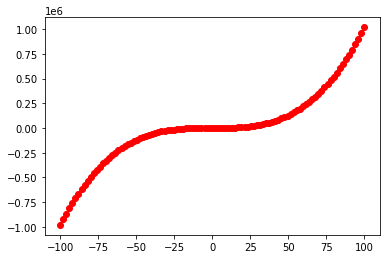

In [11]:
fig, ax = plt.subplots()
original = lambda x: (math.sin(x**2))**2 + math.sin(x) + (math.cos(x**2))**2 + math.cos(x) + x**3 + 2*x**2 + 4
ax.plot(numpy.linspace(-100,100,100), [original(x) for x in numpy.linspace(-100,100,100)], color = 'r', marker = 'o', label='original')
aprox = lambda x: toolbox.compile(hof.__getitem__(0))(x)
ax.plot(numpy.linspace(-100,100,100), [aprox(x) for x in numpy.linspace(-100,100,100)], color = 'b', marker='v', label='aproximation')
plt.legend()